<a href="https://colab.research.google.com/github/jmoralespineda/TEORIA_DE_SE-ALES/blob/main/Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

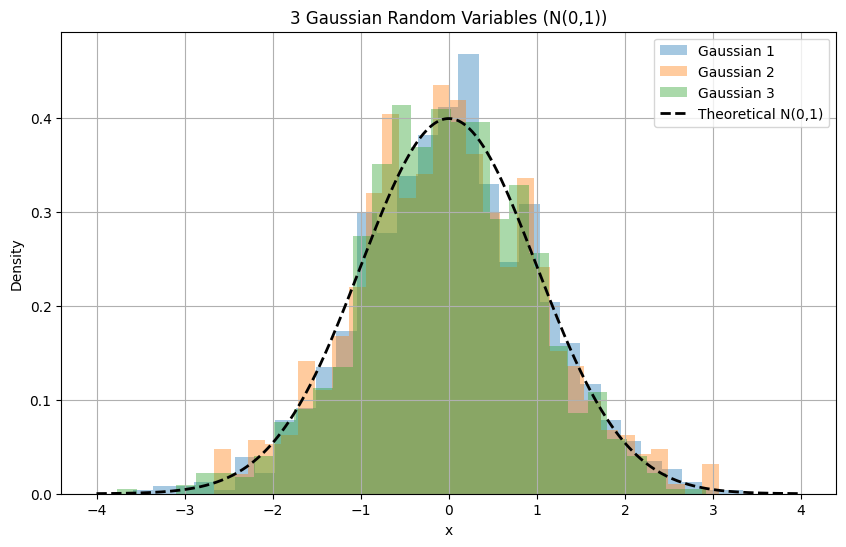

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 0      # mean
sigma = 1   # std deviation
n_samples = 1000  # samples per Gaussian
n_vars = 3  # number of Gaussian random variables

x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))

for i in range(n_vars):
    # Generate Gaussian random variable
    data = np.random.normal(mu, sigma, n_samples)

    # Plot histogram
    plt.hist(data, bins=30, density=True, alpha=0.4, label=f"Gaussian {i+1}")

# Plot theoretical PDF
plt.plot(x, pdf, "k--", lw=2, label="Theoretical N(0,1)")

plt.title("3 Gaussian Random Variables (N(0,1))")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


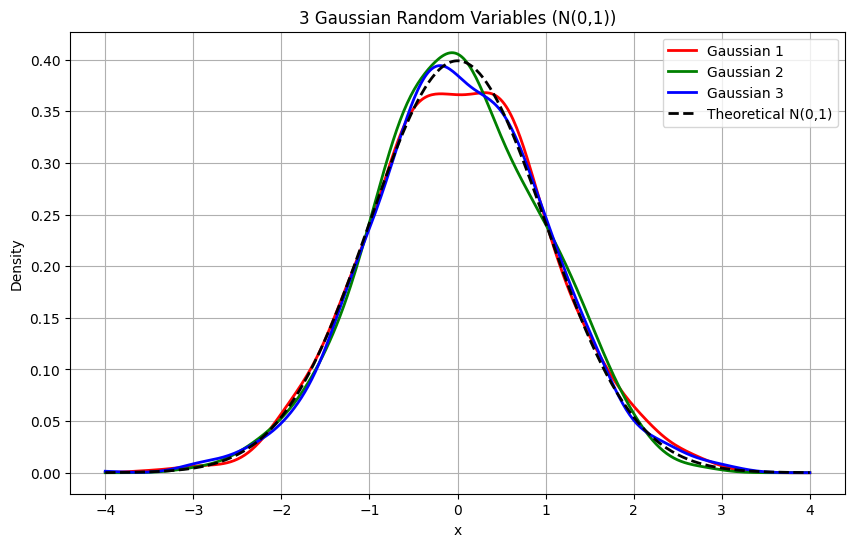

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Parameters
mu = 0      # mean
sigma = 1   # std deviation
n_samples = 1000  # samples per Gaussian
n_vars = 3  # number of Gaussian random variables

x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b']  # line colors for 3 Gaussians

for i in range(n_vars):
    # Generate Gaussian random variable
    data = np.random.normal(mu, sigma, n_samples)

    # Estimate density with KDE for smooth line
    kde = gaussian_kde(data)
    plt.plot(x, kde(x), color=colors[i], lw=2, label=f"Gaussian {i+1}")

# Plot theoretical PDF
plt.plot(x, pdf, "k--", lw=2, label="Theoretical N(0,1)")

plt.title("3 Gaussian Random Variables (N(0,1))")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


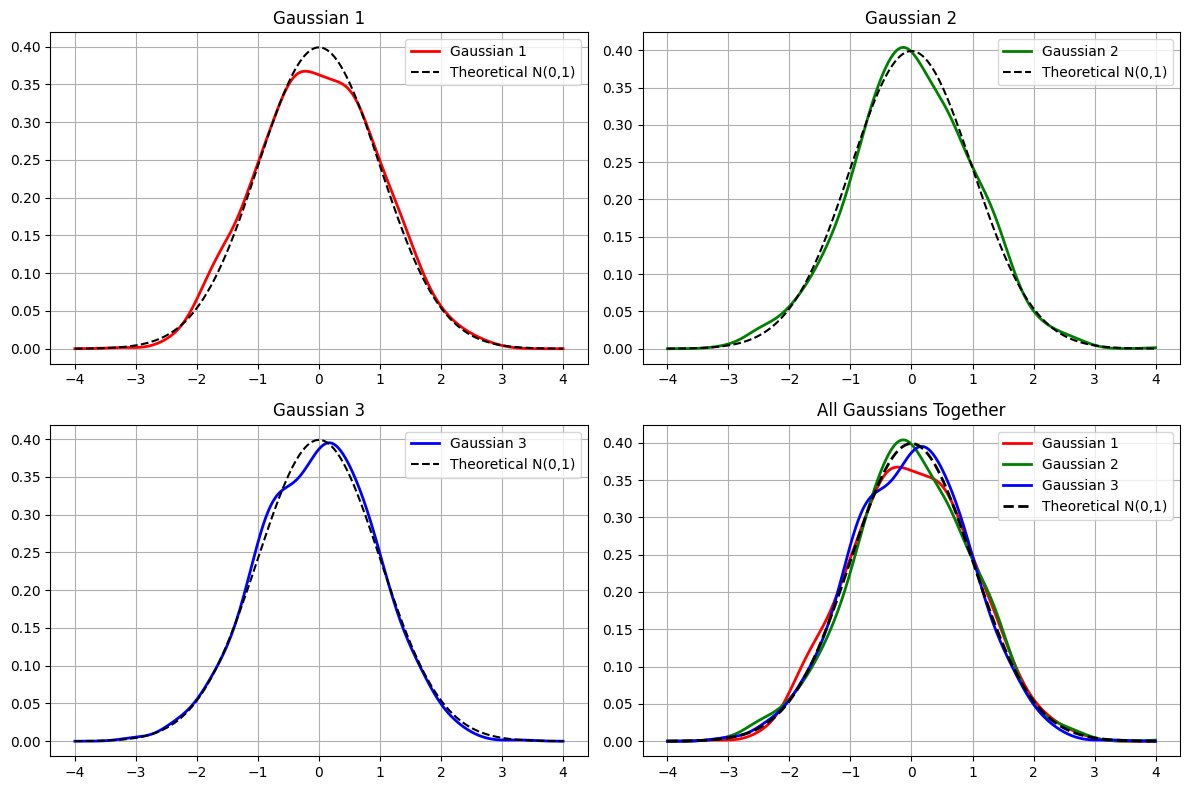

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Parameters
mu = 0
sigma = 1
n_samples = 1000
n_vars = 3

x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x, mu, sigma)

colors = ['r', 'g', 'b']
data_list = []

# Generate data for each Gaussian
for i in range(n_vars):
    data = np.random.normal(mu, sigma, n_samples)
    data_list.append(data)

# --- Figure with 4 subplots ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot each Gaussian in its own subplot
for i, ax in enumerate(axes.flat[:3]):
    kde = gaussian_kde(data_list[i])
    ax.plot(x, kde(x), color=colors[i], lw=2, label=f"Gaussian {i+1}")
    ax.plot(x, pdf, "k--", lw=1.5, label="Theoretical N(0,1)")
    ax.set_title(f"Gaussian {i+1}")
    ax.legend()
    ax.grid(True)

# Plot all Gaussians together
ax = axes.flat[3]
for i in range(n_vars):
    kde = gaussian_kde(data_list[i])
    ax.plot(x, kde(x), color=colors[i], lw=2, label=f"Gaussian {i+1}")
ax.plot(x, pdf, "k--", lw=2, label="Theoretical N(0,1)")
ax.set_title("All Gaussians Together")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


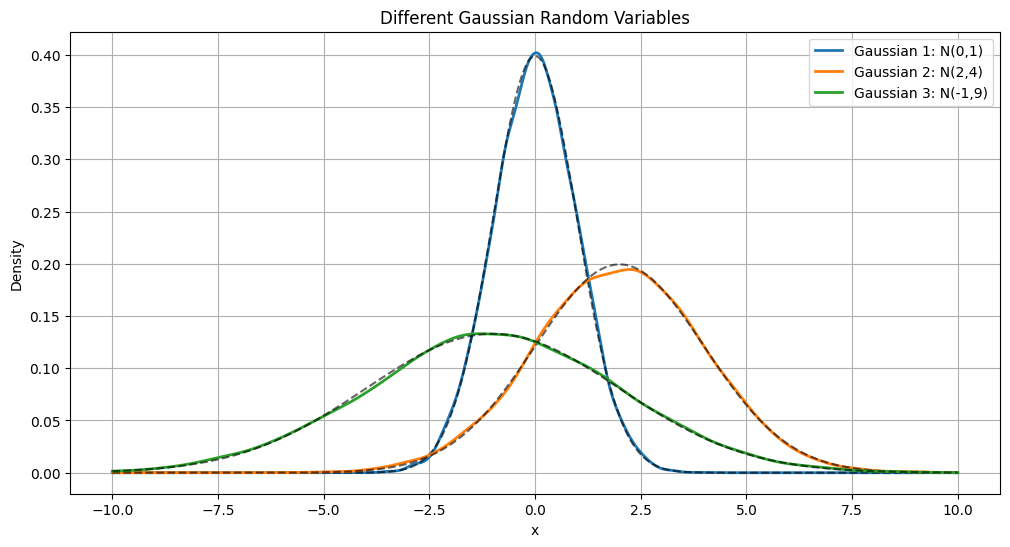

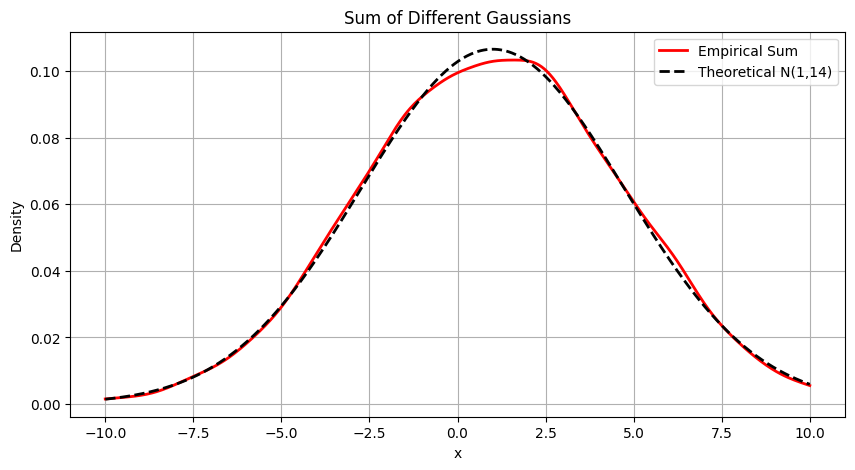

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Parameters for 3 Gaussians
params = [
    {"mu": 0, "sigma": 1},
    {"mu": 2, "sigma": 2},
    {"mu": -1, "sigma": 3}
]

n_samples = 10000
x = np.linspace(-10, 10, 500)

# Store generated data
data_list = []

# Plot each Gaussian separately
plt.figure(figsize=(12, 6))
for i, p in enumerate(params):
    mu, sigma = p["mu"], p["sigma"]
    data = np.random.normal(mu, sigma, n_samples)
    data_list.append(data)

    # Empirical KDE
    kde = gaussian_kde(data)
    plt.plot(x, kde(x), lw=2, label=f"Gaussian {i+1}: N({mu},{sigma**2})")
    # Theoretical PDF
    plt.plot(x, norm.pdf(x, mu, sigma), "k--", alpha=0.6)

plt.title("Different Gaussian Random Variables")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# --- Sum of Gaussians ---
S = sum(data_list)

# Theoretical mean and variance of the sum
mu_sum = sum(p["mu"] for p in params)
var_sum = sum(p["sigma"]**2 for p in params)
sigma_sum = np.sqrt(var_sum)

# Plot the sum
plt.figure(figsize=(10, 5))
kde_sum = gaussian_kde(S)
plt.plot(x, kde_sum(x), "r", lw=2, label="Empirical Sum")
plt.plot(x, norm.pdf(x, mu_sum, sigma_sum), "k--", lw=2,
         label=f"Theoretical N({mu_sum},{var_sum})")
plt.title("Sum of Different Gaussians")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


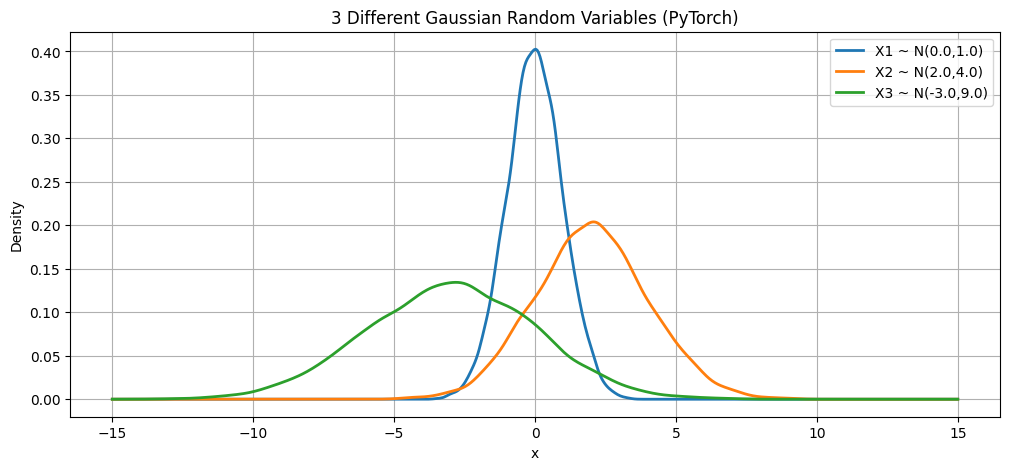

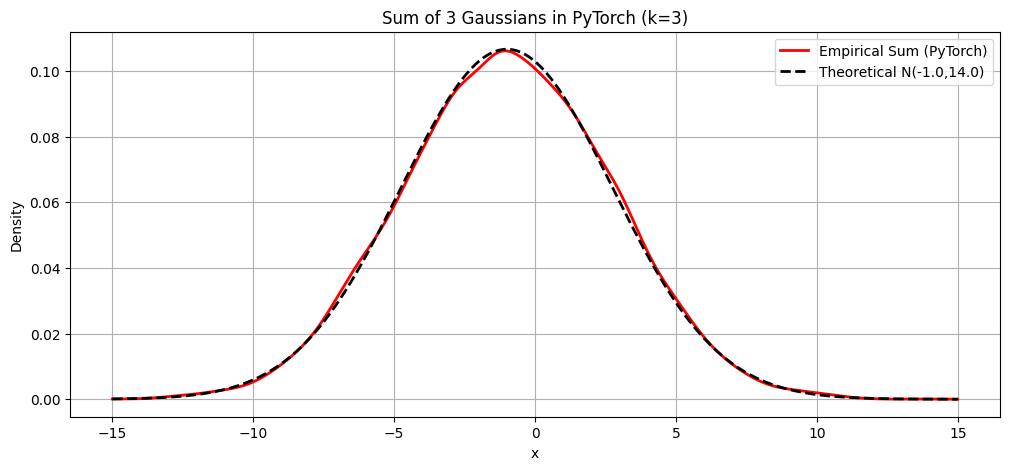

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde, norm

# Parameters for k=3 Gaussians
params = [
    {"mu": 0.0, "sigma": 1.0},
    {"mu": 2.0, "sigma": 2.0},
    {"mu": -3.0, "sigma": 3.0}
]

n_samples = 10000
x = np.linspace(-15, 15, 600)

# Generate data with PyTorch
data_list = [torch.normal(mean=p["mu"], std=p["sigma"], size=(n_samples,)) for p in params]

# Convert to numpy for plotting
data_np = [d.numpy() for d in data_list]

# Plot each Gaussian
plt.figure(figsize=(12,5))
for i, data in enumerate(data_np):
    kde = gaussian_kde(data)
    plt.plot(x, kde(x), lw=2, label=f"X{i+1} ~ N({params[i]['mu']},{params[i]['sigma']**2})")
plt.title("3 Different Gaussian Random Variables (PyTorch)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Sum of Gaussians
S = sum(data_list).numpy()

# Theoretical sum
mu_sum = sum(p["mu"] for p in params)
var_sum = sum(p["sigma"]**2 for p in params)
sigma_sum = np.sqrt(var_sum)

# Plot sum distribution
plt.figure(figsize=(12,5))
kde_sum = gaussian_kde(S)
plt.plot(x, kde_sum(x), "r", lw=2, label="Empirical Sum (PyTorch)")
plt.plot(x, norm.pdf(x, mu_sum, sigma_sum), "k--", lw=2,
         label=f"Theoretical N({mu_sum},{var_sum})")
plt.title("Sum of 3 Gaussians in PyTorch (k=3)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


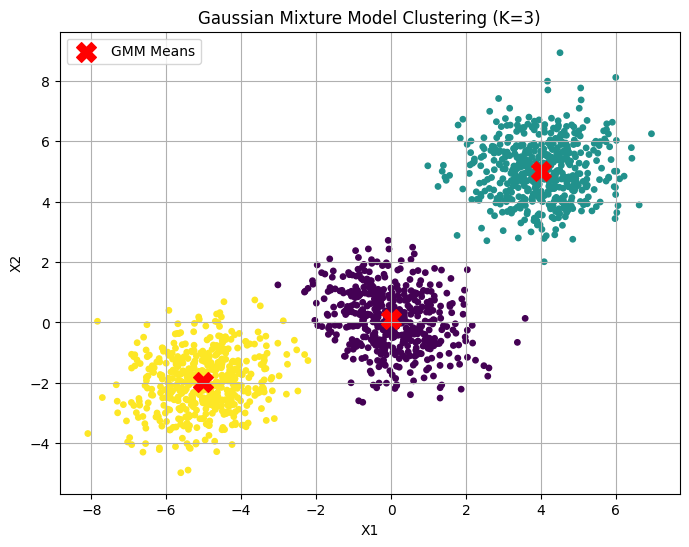

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# --- 1. Generate synthetic data from 3 Gaussians ---
np.random.seed(42)
n_samples = 500

# Parameters for true Gaussians
mu = [(-5, -2), (0, 0), (4, 5)]
cov = [np.array([[1, 0.2],[0.2, 1]]),
       np.array([[1, -0.3],[-0.3, 1]]),
       np.array([[1, 0],[0, 1]])]

X = np.vstack([
    np.random.multivariate_normal(mu[0], cov[0], n_samples),
    np.random.multivariate_normal(mu[1], cov[1], n_samples),
    np.random.multivariate_normal(mu[2], cov[2], n_samples)
])

# --- 2. Fit a Gaussian Mixture Model ---
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Predicted cluster labels
labels = gmm.predict(X)

# --- 3. Visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=labels, s=15, cmap='viridis')

# Plot estimated means
plt.scatter(gmm.means_[:,0], gmm.means_[:,1],
            c='red', s=200, marker='X', label='GMM Means')

plt.title("Gaussian Mixture Model Clustering (K=3)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()


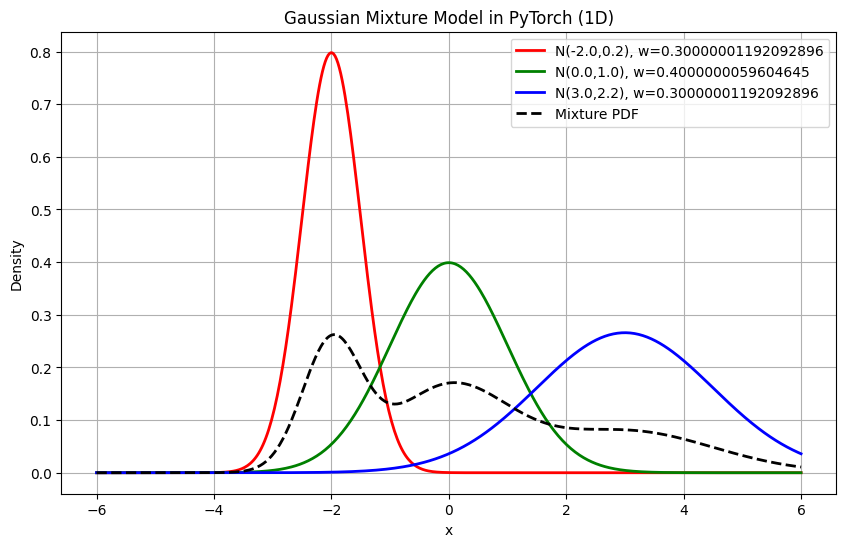

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Parameters for 3 Gaussians
weights = torch.tensor([0.3, 0.4, 0.3])   # mixture weights (must sum to 1)
mus = torch.tensor([-2.0, 0.0, 3.0])      # means
sigmas = torch.tensor([0.5, 1.0, 1.5])    # std deviations

# Define x-axis
x = torch.linspace(-6, 6, 500)

# Gaussian PDF function
def gaussian_pdf(x, mu, sigma):
    return (1.0 / (sigma * torch.sqrt(torch.tensor(2.0 * np.pi)))) * \
           torch.exp(-0.5 * ((x - mu) / sigma)**2)

# Compute each Gaussian
pdfs = [gaussian_pdf(x, mus[i], sigmas[i]) for i in range(len(mus))]

# Compute mixture PDF
mixture_pdf = sum(weights[i] * pdfs[i] for i in range(len(mus)))

# --- Plot ---
plt.figure(figsize=(10,6))

# Plot each Gaussian separately
colors = ["r", "g", "b"]
for i, pdf in enumerate(pdfs):
    plt.plot(x.numpy(), pdf.numpy(), colors[i], lw=2,
             label=f"N({mus[i].item()},{sigmas[i].item()**2:.1f}), w={weights[i].item()}")

# Plot mixture
plt.plot(x.numpy(), mixture_pdf.numpy(), "k--", lw=2, label="Mixture PDF")

plt.title("Gaussian Mixture Model in PyTorch (1D)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


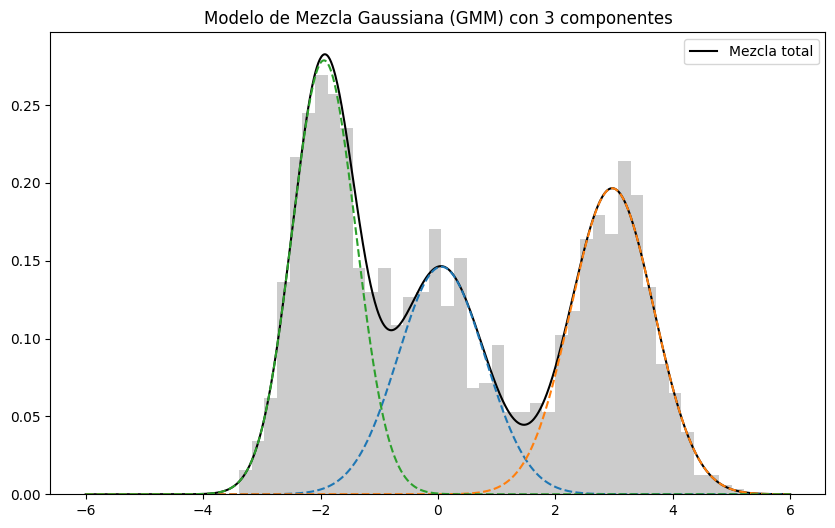

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# -----------------------------
# Generar datos simulados
# -----------------------------
np.random.seed(0)
n_samples = 500

# Tres grupos gaussianos
data1 = np.random.normal(loc=-2, scale=0.5, size=(n_samples, 1))
data2 = np.random.normal(loc=0, scale=1.0, size=(n_samples, 1))
data3 = np.random.normal(loc=3, scale=0.7, size=(n_samples, 1))

X = np.vstack([data1, data2, data3])

# -----------------------------
# Ajustar un GMM con 3 componentes
# -----------------------------
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X)

# -----------------------------
# Graficar resultados
# -----------------------------
x = np.linspace(-6, 6, 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)

# PDFs de cada componente
responsibilities = gmm.predict_proba(x)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.figure(figsize=(10, 6))
plt.hist(X, bins=40, density=True, alpha=0.4, color='gray')
plt.plot(x, pdf, '-k', label='Mezcla total')
plt.plot(x, pdf_individual, '--')
plt.title("Modelo de Mezcla Gaussiana (GMM) con 3 componentes")
plt.legend()
plt.show()

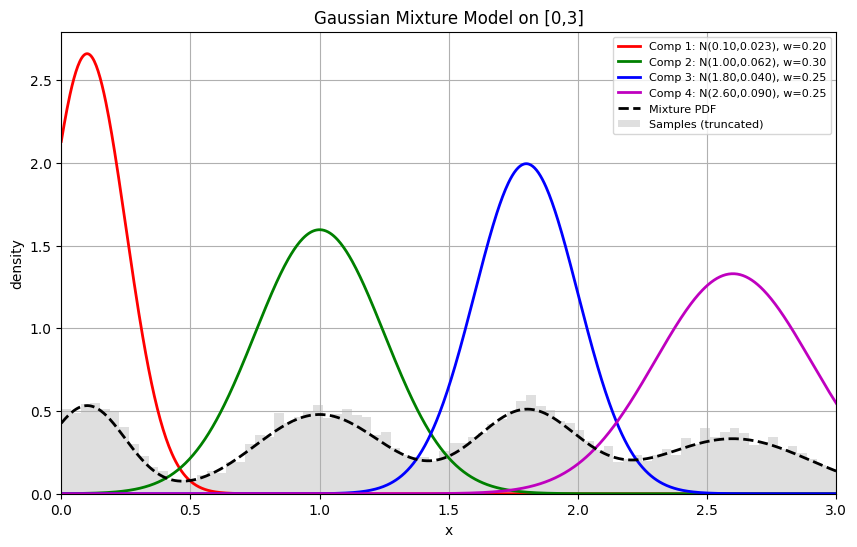

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# --- Settings ---
torch.manual_seed(0)
K = 4                          # number of components
weights = torch.tensor([0.2,0.3,0.25,0.25])  # must sum to 1
mus = torch.tensor([0.1, 1.0, 1.8, 2.6])     # means in [0,3]
sigmas = torch.tensor([0.15, 0.25, 0.2, 0.3])# std dev > 0

# domain [0,3]
x_torch = torch.linspace(0.0, 3.0, 800)
x = x_torch.numpy()

# Gaussian PDF (vectorized)
def gaussian_pdf(x, mu, sigma):
    coeff = 1.0 / (sigma * torch.sqrt(2.0 * torch.tensor(np.pi)))
    ex = torch.exp(-0.5 * ((x - mu) / sigma)**2)
    return coeff * ex

# compute each component pdf on grid and the weighted mixture
pdfs = [gaussian_pdf(x_torch, mus[k], sigmas[k]) for k in range(K)]
mixture_pdf = sum(weights[k] * pdfs[k] for k in range(K))

# --- Sampling from the mixture (and optionally keep samples in [0,3]) ---
n_samples = 10000
# sample component indices from categorical distribution
comp_idx = torch.multinomial(weights, n_samples, replacement=True)  # (n_samples,)
# sample from the selected normal for each index
z = torch.randn(n_samples)
samples = torch.empty(n_samples)
for k in range(K):
    mask = (comp_idx == k)
    if mask.any():
        nk = mask.sum().item()
        samples[mask] = mus[k] + sigmas[k] * torch.randn(nk)

# optional: reject samples outside [0,3] and resample until n_samples kept
def sample_in_interval(n, weights, mus, sigmas, low=0.0, high=3.0):
    out = []
    while len(out) < n:
        idx = torch.multinomial(weights, n - len(out), replacement=True)
        # draw normals
        draws = mus[idx] + sigmas[idx] * torch.randn_like(idx, dtype=torch.float)
        # keep those inside
        keep = draws[(draws >= low) & (draws <= high)]
        out.append(keep)
    return torch.cat(out)[:n]

samples_trunc = sample_in_interval(n_samples, weights, mus, sigmas, 0.0, 3.0)

# --- Plotting ---
plt.figure(figsize=(10,6))
colors = ['r','g','b','m']
for k in range(K):
    plt.plot(x, pdfs[k].numpy(), color=colors[k%len(colors)], lw=2,
             label=f'Comp {k+1}: N({mus[k].item():.2f},{(sigmas[k].item()**2):.3f}), w={weights[k].item():.2f}')
plt.plot(x, mixture_pdf.numpy(), 'k--', lw=2, label='Mixture PDF')

# histogram of (truncated) samples over [0,3]
plt.hist(samples_trunc.numpy(), bins=80, density=True, alpha=0.25, color='gray', label='Samples (truncated)')

plt.xlim(0,3)
plt.xlabel('x')
plt.ylabel('density')
plt.title('Gaussian Mixture Model on [0,3]')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.show()


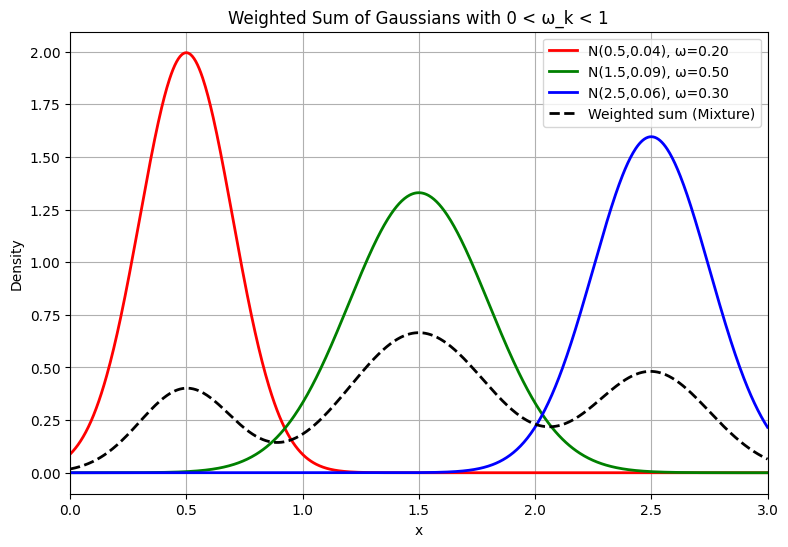

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 3
mus = torch.tensor([0.5, 1.5, 2.5])      # means
sigmas = torch.tensor([0.2, 0.3, 0.25])  # std devs
weights = torch.tensor([0.2, 0.5, 0.3])  # must be >0, <1 and sum=1

# domain
x_torch = torch.linspace(0, 3, 800)
x = x_torch.numpy()

# Gaussian pdf
def gaussian_pdf(x, mu, sigma):
    coeff = 1.0 / (sigma * torch.sqrt(2.0 * torch.tensor(np.pi)))
    ex = torch.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return coeff * ex

# compute each Gaussian and the mixture
pdfs = [gaussian_pdf(x_torch, mus[k], sigmas[k]) for k in range(K)]
mixture_pdf = sum(weights[k] * pdfs[k] for k in range(K))

# plot
plt.figure(figsize=(9,6))
colors = ['r','g','b']
for k in range(K):
    plt.plot(x, pdfs[k].numpy(), color=colors[k], lw=2,
             label=f'N({mus[k].item():.1f},{sigmas[k].item()**2:.2f}), ω={weights[k].item():.2f}')
plt.plot(x, mixture_pdf.numpy(), 'k--', lw=2, label='Weighted sum (Mixture)')
plt.xlim(0,3)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Weighted Sum of Gaussians with 0 < ω_k < 1")
plt.legend()
plt.grid(True)
plt.show()


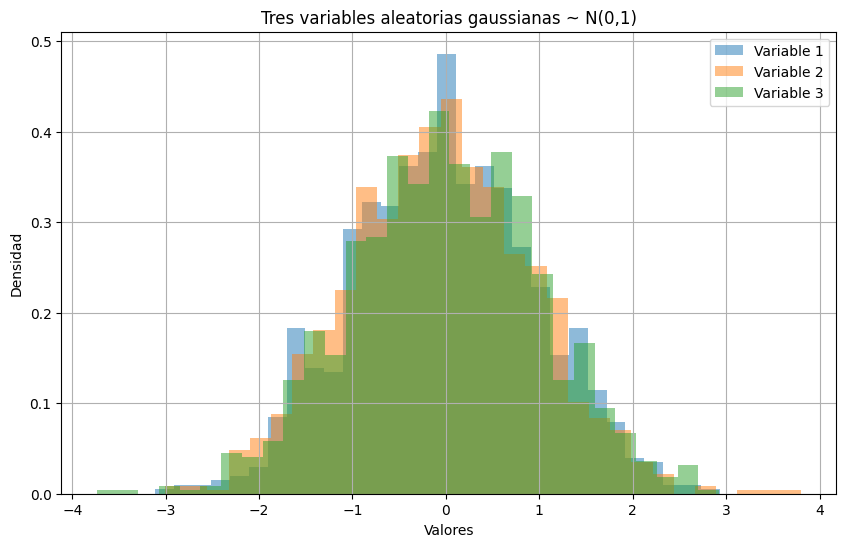

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parámetros de la distribución
# -----------------------------
mu = 0        # Media
var = 1       # Varianza
sigma = np.sqrt(var)  # Desviación estándar

# -----------------------------
# Configuración de la gráfica
# -----------------------------
plt.figure(figsize=(10, 6))

# -----------------------------
# Bucle para generar 3 variables aleatorias gaussianas
# -----------------------------
for i in range(3):
    # Generar una variable aleatoria Gaussiana con N(0,1)
    # 1000 muestras para ver su distribución
    data = np.random.normal(mu, sigma, 1000)

    # Graficar histograma de la variable aleatoria
    plt.hist(data, bins=30, density=True, alpha=0.5, label=f'Variable {i+1}')

# -----------------------------
# Personalización de la gráfica
# -----------------------------
plt.title("Tres variables aleatorias gaussianas ~ N(0,1)")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

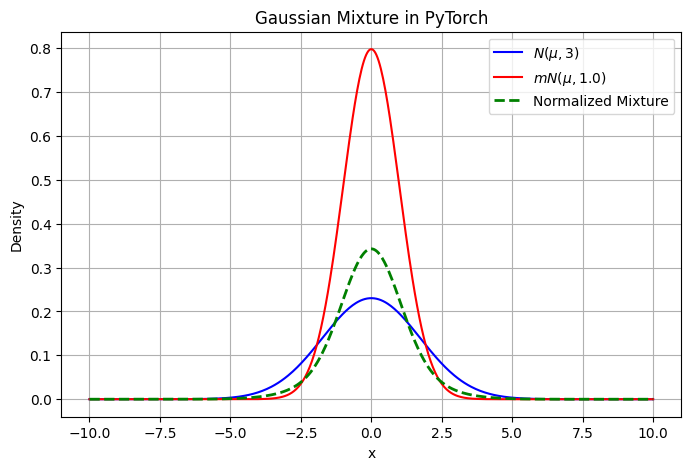

In [ ]:
import torch
import matplotlib.pyplot as plt

# Parameters
mu = 0.0
var1 = 3.0
var2 = 1.0   # you can change this
m = 2.0      # weight multiplier

# Define x range
x = torch.linspace(-10, 10, 500)

# Gaussian PDF function
def gaussian(x, mu, var):
    # Convert var to a tensor before using it in torch.sqrt
    var_tensor = torch.tensor(var, dtype=torch.float32)
    return 1.0 / torch.sqrt(2 * torch.pi * var_tensor) * torch.exp(- (x - mu) ** 2 / (2 * var_tensor))

# Define the two Gaussians
g1 = gaussian(x, mu, var1)
g2 = gaussian(x, mu, var2)

# Weighted sum (not normalized yet)
sum_gaussians = g1 + m * g2

# Normalization constant (area = 1 + m)
Z = 1 + m
mixture = (1/(1+m)) * g1 + (m/(1+m)) * g2

# Plot
plt.figure(figsize=(8,5))
plt.plot(x.numpy(), g1.numpy(), label=r'$N(\mu,3)$', color='blue')
plt.plot(x.numpy(), (m*g2).numpy(), label=fr'$m N(\mu,{var2})$', color='red')
plt.plot(x.numpy(), mixture.numpy(), label='Normalized Mixture', color='green', linestyle='--', linewidth=2)

plt.title("Gaussian Mixture in PyTorch")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

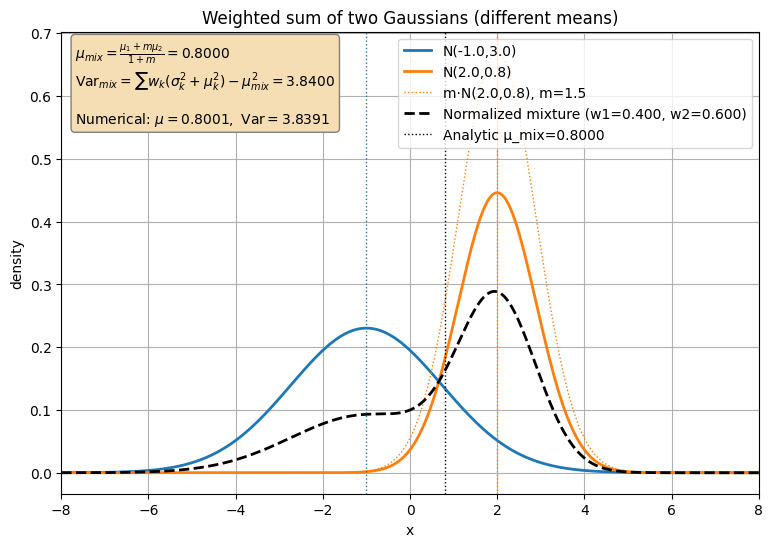

Areas (should be ~1): area_g1= 0.9999732971191406 area_g2= 1.0
Area scaled (m*area_g2)= 1.5 area_sum= 2.4999732971191406
Analytic mean = 0.800000, Analytic var = 3.840000
Numeric mean  = 0.800097, Numeric var  = 3.839140


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Parameters (modify as needed)
mu1 = -1.0
var1 = 3.0
mu2 = 2.0
var2 = 0.8
m = 1.5   # multiplier for second Gaussian (m>0)
# weights will be w1 = 1/(1+m), w2 = m/(1+m)

# Grid
x_t = torch.linspace(-8.0, 8.0, 2000)
x = x_t.numpy()

# Gaussian PDF (vectorized, PyTorch)
def gaussian_pdf(x, mu, var):
    # Convert var to a tensor before using it in torch.sqrt
    var_tensor = torch.tensor(var, dtype=torch.float32)
    return 1.0 / torch.sqrt(2.0 * torch.pi * var_tensor) * torch.exp(- (x - mu)**2 / (2.0 * var_tensor))

g1 = gaussian_pdf(x_t, mu1, var1)          # N(mu1, var1)
g2 = gaussian_pdf(x_t, mu2, var2)          # N(mu2, var2)
g2_scaled = m * g2                         # m * N(mu2,var2)

# Normalized mixture (weights w1,w2)
Z = 1.0 + m
w1 = 1.0 / Z
w2 = m / Z
mixture = w1 * g1 + w2 * g2

# Analytical mean and variance of the normalized mixture
mu_mix_analytic = (1.0 * mu1 + m * mu2) / Z
# E[X^2] = w1*(var1 + mu1^2) + w2*(var2 + mu2^2)
EX2 = w1 * (var1 + mu1**2) + w2 * (var2 + mu2**2)
var_mix_analytic = EX2 - mu_mix_analytic**2

# Numerical checks via integration (trapz)
area_g1 = torch.trapz(g1, x_t).item()
area_g2 = torch.trapz(g2, x_t).item()
area_scaled = torch.trapz(g2_scaled, x_t).item()
area_sum = torch.trapz(g1 + g2_scaled, x_t).item()
# normalize numeric mixture and compute moments
mixture_num = (g1 + g2_scaled) / area_sum
mu_num = torch.trapz(x_t * mixture_num, x_t).item()
var_num = torch.trapz((x_t - mu_num)**2 * mixture_num, x_t).item()

# Plot
plt.figure(figsize=(9,6))
plt.plot(x, g1.numpy(), color='C0', lw=2, label=f'N({mu1},{var1})')
plt.plot(x, g2.numpy(), color='C1', lw=2, label=f'N({mu2},{var2})')
plt.plot(x, g2_scaled.numpy(), color='C1', lw=1, linestyle=':', label=f'm·N({mu2},{var2}), m={m}')
plt.plot(x, mixture.numpy(), 'k--', lw=2, label=f'Normalized mixture (w1={w1:.3f}, w2={w2:.3f})')

# vertical lines: component means and mixture mean
plt.axvline(mu1, color='C0', linestyle=':', linewidth=1)
plt.axvline(mu2, color='C1', linestyle=':', linewidth=1)
plt.axvline(mu_mix_analytic, color='k', linestyle=':', linewidth=1, label=f'Analytic μ_mix={mu_mix_analytic:.4f}')

# annotations: formulas and numeric results
txt = (
    rf"$\mu_{{mix}}=\frac{{\mu_1 + m\mu_2}}{{1+m}} = {mu_mix_analytic:.4f}$" "\n"
    rf"$\mathrm{{Var}}_{{mix}}=\sum w_k(\sigma_k^2+\mu_k^2)-\mu_{{mix}}^2 = {var_mix_analytic:.4f}$" "\n\n"
    rf"Numerical: $\mu={mu_num:.4f},\ \mathrm{{Var}}={var_num:.4f}$"
)
plt.text(0.02, 0.98, txt, transform=plt.gca().transAxes, va='top', fontsize=10, bbox=dict(boxstyle='round', fc='wheat', ec='0.5'))

plt.title("Weighted sum of two Gaussians (different means)")
plt.xlabel("x")
plt.ylabel("density")
plt.xlim(float(x_t[0]), float(x_t[-1]))
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Print summary numbers
print("Areas (should be ~1): area_g1=", area_g1, "area_g2=", area_g2)
print("Area scaled (m*area_g2)=", area_scaled, "area_sum=", area_sum)
print(f"Analytic mean = {mu_mix_analytic:.6f}, Analytic var = {var_mix_analytic:.6f}")
print(f"Numeric mean  = {mu_num:.6f}, Numeric var  = {var_num:.6f}")

In [ ]:
import torch

# Parameters
mu1 = torch.tensor(-1.0)   # mean of first Gaussian
var1 = torch.tensor(3.0)   # variance of first Gaussian
mu2 = torch.tensor(2.0)    # mean of second Gaussian
var2 = torch.tensor(0.8)   # variance of second Gaussian
m   = torch.tensor(1.5)    # multiplier

# Weights
w1 = 1 / (1 + m)
w2 = m / (1 + m)

# Analytic mean
mean_mix = w1 * mu1 + w2 * mu2

# Analytic variance
var_mix = w1 * var1 + w2 * var2 + w1 * w2 * (mu1 - mu2)**2

print(f"w1 = {w1.item():.4f}, w2 = {w2.item():.4f}")
print(f"Analytic mean     = {mean_mix.item():.4f}")
print(f"Analytic variance = {var_mix.item():.4f}")


w1 = 0.4000, w2 = 0.6000
Analytic mean     = 0.8000
Analytic variance = 3.8400


w1 = 0.4000, w2 = 0.6000
Analytic mean     = 0.8000
Analytic variance = 3.8400


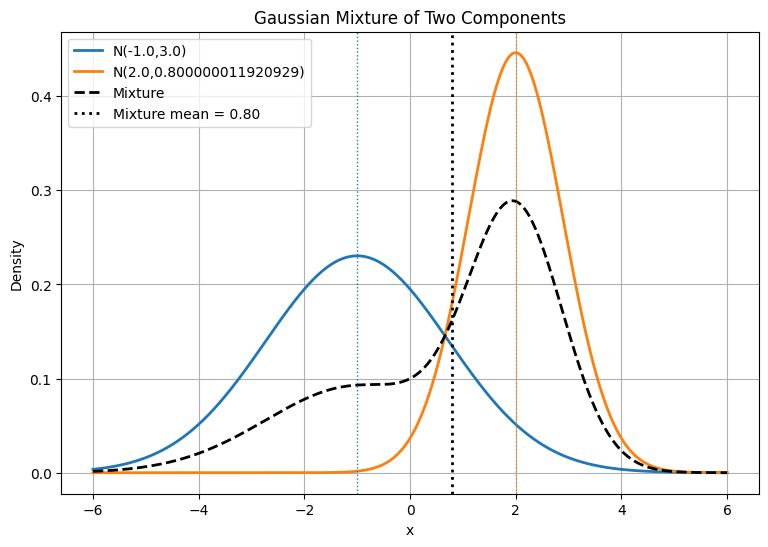

In [ ]:
import torch
import matplotlib.pyplot as plt

# --- Parameters of the two Gaussians ---
mu1 = torch.tensor(-1.0)   # mean (μ₁) of the first Gaussian
var1 = torch.tensor(3.0)   # variance (σ₁²) of the first Gaussian

mu2 = torch.tensor(2.0)    # mean (μ₂) of the second Gaussian
var2 = torch.tensor(0.8)   # variance (σ₂²) of the second Gaussian

m   = torch.tensor(1.5)    # multiplier for the second Gaussian

# --- Mixture weights ---
w1 = 1 / (1 + m)           # weight of the first Gaussian
w2 = m / (1 + m)           # weight of the second Gaussian

# --- Analytic mean and variance ---
mean_mix = w1 * mu1 + w2 * mu2
var_mix = w1 * var1 + w2 * var2 + w1 * w2 * (mu1 - mu2)**2

print(f"w1 = {w1.item():.4f}, w2 = {w2.item():.4f}")
print(f"Analytic mean     = {mean_mix.item():.4f}")
print(f"Analytic variance = {var_mix.item():.4f}")

# --- Define Gaussian PDF ---
def gaussian_pdf(x, mu, var):
    return 1.0 / torch.sqrt(2.0 * torch.pi * var) * torch.exp(- (x - mu)**2 / (2.0 * var))

# --- X axis for plotting ---
x = torch.linspace(-6, 6, 1000)

# --- PDFs of the components and mixture ---
g1 = gaussian_pdf(x, mu1, var1)
g2 = gaussian_pdf(x, mu2, var2)
mixture = w1 * g1 + w2 * g2

# --- Plotting ---
plt.figure(figsize=(9,6))

# First Gaussian
plt.plot(x.numpy(), g1.numpy(), label=f'N({mu1.item()},{var1.item()})', color='C0', lw=2)

# Second Gaussian
plt.plot(x.numpy(), g2.numpy(), label=f'N({mu2.item()},{var2.item()})', color='C1', lw=2)

# Mixture
plt.plot(x.numpy(), mixture.numpy(), 'k--', lw=2, label='Mixture')

# Vertical lines for component means and mixture mean
plt.axvline(mu1.item(), color='C0', linestyle=':', lw=1)
plt.axvline(mu2.item(), color='C1', linestyle=':', lw=1)
plt.axvline(mean_mix.item(), color='k', linestyle=':', lw=2, label=f'Mixture mean = {mean_mix.item():.2f}')

# Titles and labels
plt.title("Gaussian Mixture of Two Components")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


w1 = 0.4000, w2 = 0.6000
Analytic mean     = 0.8000
Analytic variance = 3.8400


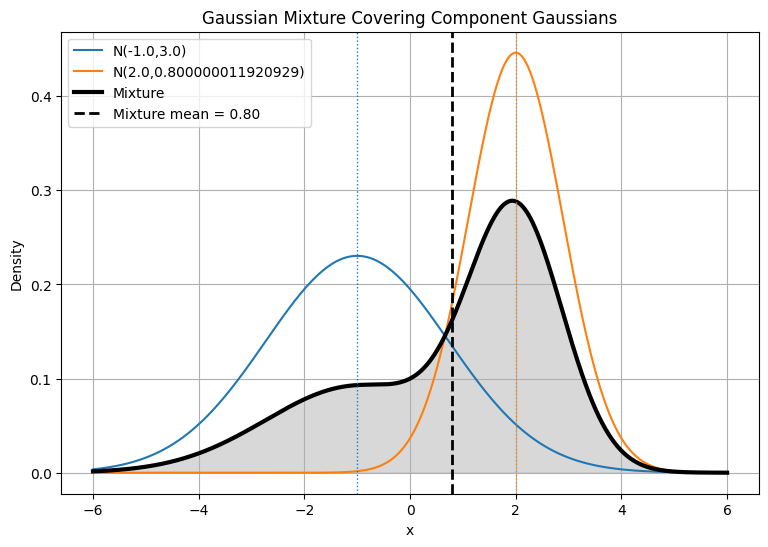

In [ ]:
import torch
import matplotlib.pyplot as plt

# --- Parameters of the two Gaussians ---
mu1 = torch.tensor(-1.0)   # mean (μ₁) of the first Gaussian
var1 = torch.tensor(3.0)   # variance (σ₁²) of the first Gaussian

mu2 = torch.tensor(2.0)    # mean (μ₂) of the second Gaussian
var2 = torch.tensor(0.8)   # variance (σ₂²) of the second Gaussian

m   = torch.tensor(1.5)    # multiplier for the second Gaussian

# --- Mixture weights ---
w1 = 1 / (1 + m)           # weight of the first Gaussian
w2 = m / (1 + m)           # weight of the second Gaussian

# --- Analytic mean and variance ---
mean_mix = w1 * mu1 + w2 * mu2
var_mix = w1 * var1 + w2 * var2 + w1 * w2 * (mu1 - mu2)**2

print(f"w1 = {w1.item():.4f}, w2 = {w2.item():.4f}")
print(f"Analytic mean     = {mean_mix.item():.4f}")
print(f"Analytic variance = {var_mix.item():.4f}")

# --- Define Gaussian PDF ---
def gaussian_pdf(x, mu, var):
    return 1.0 / torch.sqrt(2.0 * torch.pi * var) * torch.exp(- (x - mu)**2 / (2.0 * var))

# --- X axis for plotting ---
x = torch.linspace(-6, 6, 1000)

# --- PDFs of the components and mixture ---
g1 = gaussian_pdf(x, mu1, var1)
g2 = gaussian_pdf(x, mu2, var2)
mixture = w1 * g1 + w2 * g2

# --- Plotting ---
plt.figure(figsize=(9,6))

# First Gaussian (thin line)
plt.plot(x.numpy(), g1.numpy(), label=f'N({mu1.item()},{var1.item()})', color='C0', lw=1.5)

# Second Gaussian (thin line)
plt.plot(x.numpy(), g2.numpy(), label=f'N({mu2.item()},{var2.item()})', color='C1', lw=1.5)

# Mixture (bold line + shaded area)
plt.fill_between(x.numpy(), mixture.numpy(), color='gray', alpha=0.3)
plt.plot(x.numpy(), mixture.numpy(), 'k-', lw=3, label='Mixture')

# Vertical lines for component means and mixture mean
plt.axvline(mu1.item(), color='C0', linestyle=':', lw=1)
plt.axvline(mu2.item(), color='C1', linestyle=':', lw=1)
plt.axvline(mean_mix.item(), color='k', linestyle='--', lw=2, label=f'Mixture mean = {mean_mix.item():.2f}')

# Titles and labels
plt.title("Gaussian Mixture Covering Component Gaussians")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


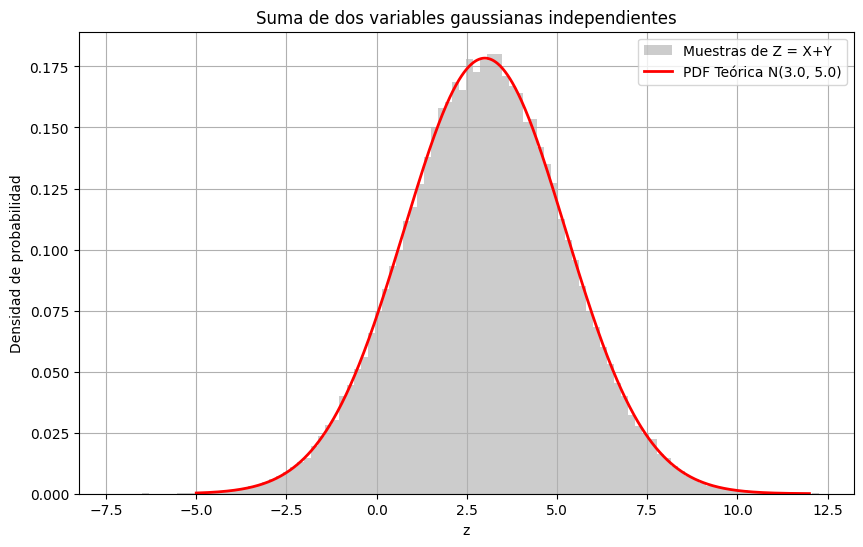

In [ ]:
import torch
import matplotlib.pyplot as plt

# Parámetros de las dos gaussianas
mu1, sigma1 = 0.0, 1.0   # N(0,1)
mu2, sigma2 = 3.0, 2.0   # N(3,4)

# Número de muestras
N = 100000

# Generar las dos variables aleatorias gaussianas
X = torch.normal(mean=mu1, std=sigma1, size=(N,))
Y = torch.normal(mean=mu2, std=sigma2, size=(N,))

# Suma de las dos variables
Z = X + Y

# Definir el rango para graficar
x_vals = torch.linspace(-5, 12, 1000)

# Función densidad gaussiana
def gaussian_pdf(x, mu, sigma):
    return (1/(sigma * torch.sqrt(torch.tensor(2*torch.pi)))) * torch.exp(-0.5 * ((x - mu)/sigma)**2)

# PDF teórica de la suma
pdf_Z = gaussian_pdf(x_vals, mu1 + mu2, torch.sqrt(torch.tensor(sigma1**2 + sigma2**2)))

# Graficar histogramas y PDF
plt.figure(figsize=(10,6))
plt.hist(Z.numpy(), bins=100, density=True, alpha=0.4, color="gray", label="Muestras de Z = X+Y")
plt.plot(x_vals, pdf_Z, "r-", linewidth=2, label=f"PDF Teórica N({mu1+mu2}, {sigma1**2+sigma2**2})")
plt.title("Suma de dos variables gaussianas independientes")
plt.xlabel("z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()


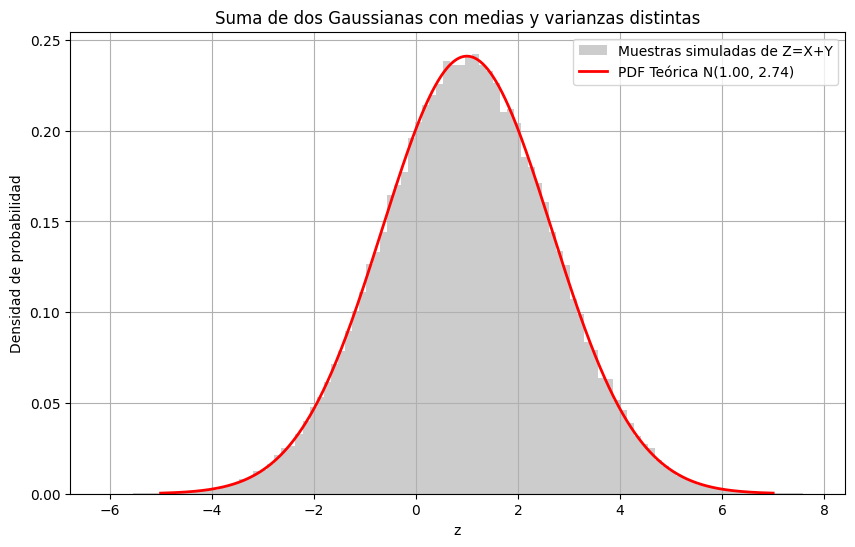

In [ ]:
import torch
import matplotlib.pyplot as plt

# Parámetros de las dos gaussianas
mu1, sigma1 = -1.0, 1.5   # N(-1, 1.5^2)
mu2, sigma2 = 2.0, 0.7    # N(2, 0.7^2)

# Número de muestras
N = 100000

# Generar dos variables gaussianas independientes
X = torch.normal(mean=mu1, std=sigma1, size=(N,))
Y = torch.normal(mean=mu2, std=sigma2, size=(N,))

# Suma de las dos
Z = X + Y

# Rango para graficar
x_vals = torch.linspace(-5, 7, 1000)

# Función densidad gaussiana
def gaussian_pdf(x, mu, sigma):
    return (1/(sigma * torch.sqrt(torch.tensor(2*torch.pi)))) * torch.exp(-0.5 * ((x - mu)/sigma)**2)

# PDF teórica de la suma
mu_z = mu1 + mu2
sigma_z = torch.sqrt(torch.tensor(sigma1**2 + sigma2**2))
pdf_Z = gaussian_pdf(x_vals, mu_z, sigma_z)

# Graficar
plt.figure(figsize=(10,6))
plt.hist(Z.numpy(), bins=100, density=True, alpha=0.4, color="gray", label="Muestras simuladas de Z=X+Y")
plt.plot(x_vals, pdf_Z, "r-", linewidth=2, label=f"PDF Teórica N({mu_z:.2f}, {sigma_z.item()**2:.2f})")
plt.title("Suma de dos Gaussianas con medias y varianzas distintas")
plt.xlabel("z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()


Estimated parameters:
mu1=-0.984, sigma1=0.981, w1=0.402
mu2=2.968, sigma2=1.491, w2=0.598


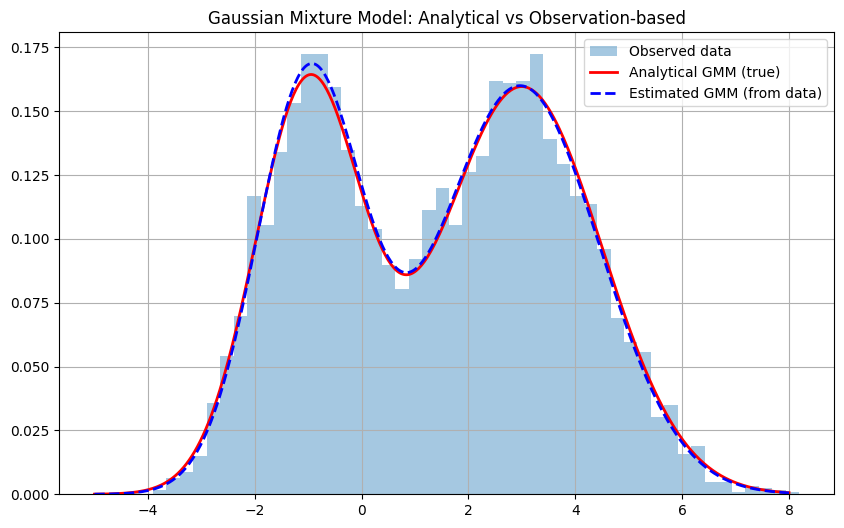

In [ ]:
import torch
import matplotlib.pyplot as plt

# ======================
# 1. ANALYTICAL GMM MODEL
# ======================

# Two Gaussians
mu1, sigma1 = -1.0, 1.0
mu2, sigma2 = 3.0, 1.5

# Mixing weights (must sum to 1)
w1, w2 = 0.4, 0.6

# Gaussian pdf
def gaussian_pdf(x, mu, sigma):
    return (1.0 / (sigma * torch.sqrt(torch.tensor(2.0 * torch.pi)))) * \
           torch.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Range for plotting
x_vals = torch.linspace(-5, 8, 500)

# Mixture model (analytical)
gmm_pdf = w1 * gaussian_pdf(x_vals, mu1, sigma1) + \
          w2 * gaussian_pdf(x_vals, mu2, sigma2)

# ======================
# 2. OBSERVATION-BASED (like EM step)
# ======================

N = 5000  # number of samples
# Sample from mixture
z = torch.bernoulli(torch.full((N,), w2))  # choose component 0 or 1
X = torch.where(z == 0,
                torch.normal(mu1, sigma1, size=(N,)),
                torch.normal(mu2, sigma2, size=(N,)))

# Responsibilities r_{ik}
# Compute pdf for each component
pdf1 = gaussian_pdf(X, mu1, sigma1)
pdf2 = gaussian_pdf(X, mu2, sigma2)

# Weighted responsibilities
r1 = (w1 * pdf1) / (w1 * pdf1 + w2 * pdf2)
r2 = (w2 * pdf2) / (w1 * pdf1 + w2 * pdf2)

# Effective counts
N1 = r1.sum()
N2 = r2.sum()

# Update parameters from observations
mu1_est = (r1 * X).sum() / N1
mu2_est = (r2 * X).sum() / N2
sigma1_est = torch.sqrt((r1 * (X - mu1_est) ** 2).sum() / N1)
sigma2_est = torch.sqrt((r2 * (X - mu2_est) ** 2).sum() / N2)
w1_est = N1 / N
w2_est = N2 / N

print("Estimated parameters:")
print(f"mu1={mu1_est.item():.3f}, sigma1={sigma1_est.item():.3f}, w1={w1_est.item():.3f}")
print(f"mu2={mu2_est.item():.3f}, sigma2={sigma2_est.item():.3f}, w2={w2_est.item():.3f}")

# ======================
# 3. PLOT
# ======================
plt.figure(figsize=(10,6))

# Histogram of observations
plt.hist(X.numpy(), bins=50, density=True, alpha=0.4, label="Observed data")

# True GMM pdf
plt.plot(x_vals, gmm_pdf, "r-", lw=2, label="Analytical GMM (true)")

# Reconstructed GMM from estimated parameters
gmm_est_pdf = w1_est * gaussian_pdf(x_vals, mu1_est, sigma1_est) + \
              w2_est * gaussian_pdf(x_vals, mu2_est, sigma2_est)
plt.plot(x_vals, gmm_est_pdf, "b--", lw=2, label="Estimated GMM (from data)")

plt.legend()
plt.grid()
plt.title("Gaussian Mixture Model: Analytical vs Observation-based")
plt.show()
